In [1]:
pip install pandas-datareader

In [16]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import ta
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2024,7,20)
print(start,end)

2018-01-01 00:00:00 2024-07-20 00:00:00


enter stock name :IBN
IBN


<ipython-input-23-25903504054a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['SMA_20'] = newData['Close'].rolling(20).mean()
<ipython-input-23-25903504054a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['SMA_50']= newData['Close'].rolling(50).mean()
<ipython-input-23-25903504054a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

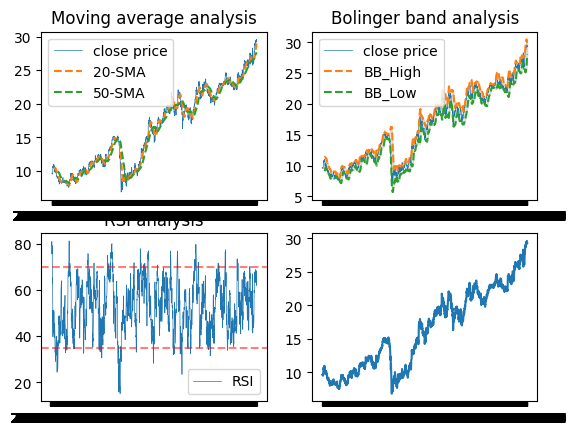

In [23]:

i = input("enter stock name :")
print(i)
def stock_analysis(stock_name):

  data = pdr.DataReader(stock_name,'stooq',str(start.date()),str(end.date())).stack('Symbols')
  newData = data.reset_index()
  newData.to_csv('%s_stock_2018_to_2024.csv'%(stock_name))
  data = pd.read_csv('/content/%s_stock_2018_to_2024.csv'%(stock_name))
  data.set_index('Date',inplace=True)
  newData=data.iloc[::-1]
  newData['SMA_20'] = newData['Close'].rolling(20).mean()
  newData['SMA_50']= newData['Close'].rolling(50).mean()
  plt.figure(1)
  plt.subplot(2,2,1)
  plt.plot(newData['Close'],label='close price',linewidth=0.5)
  plt.plot(newData['SMA_20'],label='20-SMA',linestyle='--')
  plt.plot(newData['SMA_50'],label='50-SMA',linestyle='--')
  plt.title('Moving average analysis')
  plt.legend()
  plt.subplot(2,2,2)
  bb = ta.volatility.BollingerBands(newData['Close'],window=20,window_dev=2)
  newData['BB_High']=bb.bollinger_hband()
  newData['BB_Low']=bb.bollinger_lband()
  plt.figure(1,(10,6))
  plt.plot(newData['Close'],label='close price',linewidth=0.5)
  plt.plot(newData['BB_High'],label='BB_High',linestyle='--')
  plt.plot(newData['BB_Low'],label='BB_Low',linestyle='--')
  plt.fill_between(newData.index,newData['BB_High'],newData['BB_Low'],color = 'gray',alpha=0.2)
  plt.title('Bolinger band analysis')
  plt.legend()
  plt.subplot(2,2,3)
  newData['RSI']=ta.momentum.rsi(newData['Close'],window=14)
  plt.figure(1,(12,6))
  plt.plot(newData['RSI'],label='RSI',linewidth=0.5)
  plt.axhline(70,linestyle='--',color='red',alpha=0.5)
  plt.axhline(35,linestyle='--',color='red',alpha=0.5)
  plt.title('RSI analysis')
  plt.legend()
  plt.subplot(2,2,4)
  close_price = newData['Close']
  plt.plot(close_price,label='close_price')

stock_analysis([i])

In [5]:
newData.to_csv('IBN_stock_2018_to_2024.csv')

In [6]:
data = pd.read_csv('/content/IBN_stock_2018_to_2024.csv')
data.head()

,Unnamed: 0,Date,Symbols,Close,High,Low,Open,Volume
0,0,2024-07-19,IBN,29.35,29.61,29.345,29.36,4027158.0
1,1,2024-07-18,IBN,29.46,29.55,29.400,29.41,5150982.0
2,2,2024-07-17,IBN,29.30,29.54,29.250,29.51,3872244.0
3,3,2024-07-16,IBN,29.62,29.66,29.300,29.34,7632457.0
4,4,2024-07-15,IBN,29.17,29.25,29.120,29.25,4898086.0


In [7]:
data.set_index('Date',inplace=True)
data.head()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2024-07-19,0,IBN,29.35,29.61,29.345,29.36,4027158.0
2024-07-18,1,IBN,29.46,29.55,29.400,29.41,5150982.0
2024-07-17,2,IBN,29.30,29.54,29.250,29.51,3872244.0
2024-07-16,3,IBN,29.62,29.66,29.300,29.34,7632457.0
2024-07-15,4,IBN,29.17,29.25,29.120,29.25,4898086.0


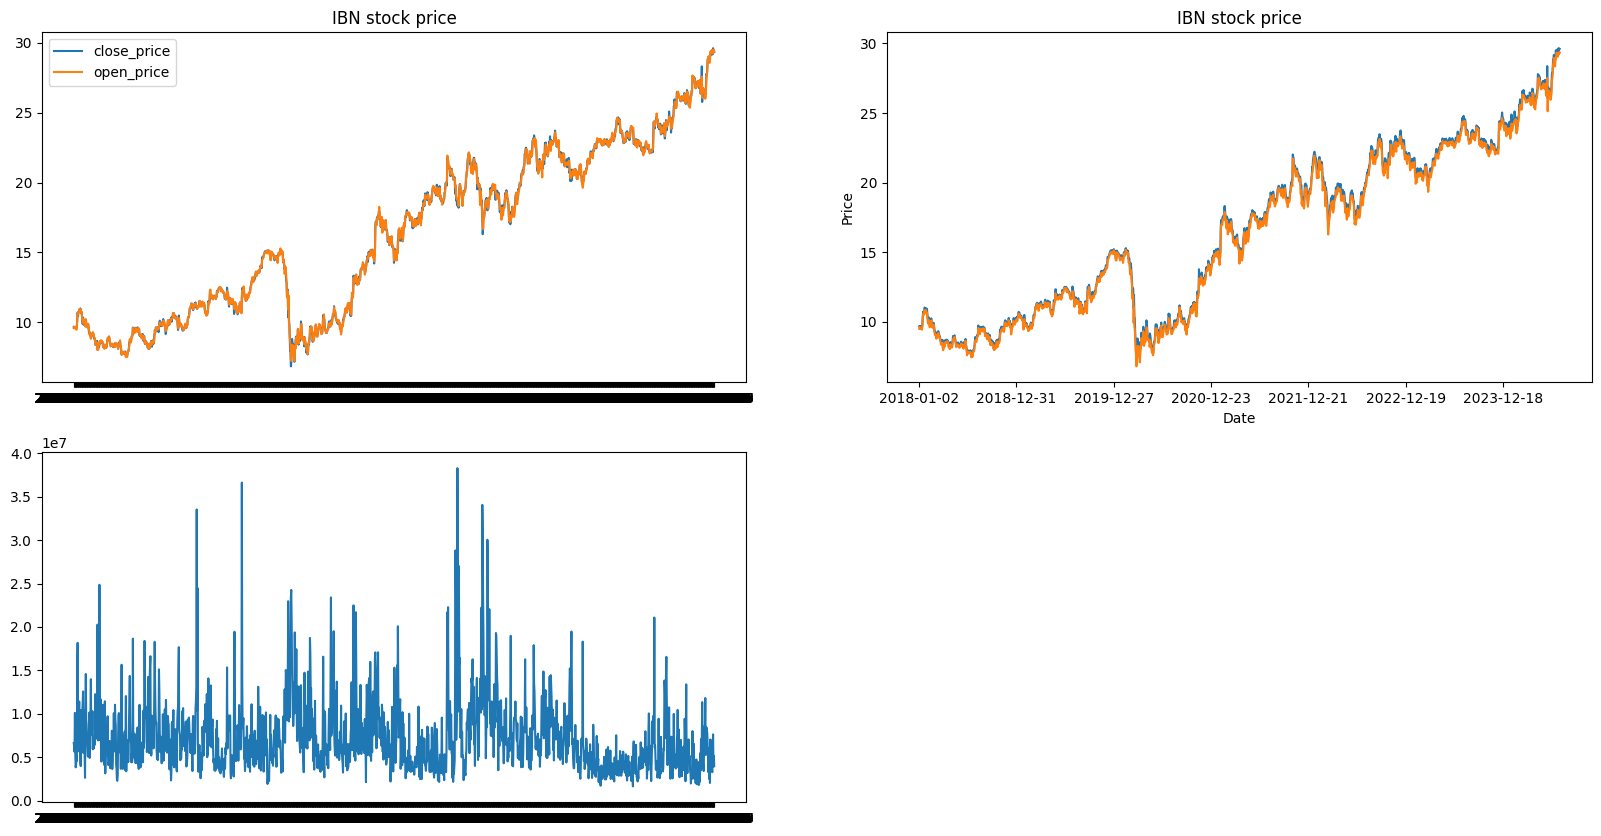

In [9]:

plt.figure(1,(20,10))
newData=data.iloc[::-1]
plt.subplot(2,2,1)
close_price = newData['Close']
plt.plot(close_price,label='close_price')
open = newData['Open']
plt.plot(open,label='open_price')
plt.legend()
plt.title('IBN stock price')



plt.subplot(2,2,2)
high=newData['High']
low = newData['Low']
high.plot(xlabel='Date',ylabel='Price',label='IBN',title='IBN stock price')
low.plot(xlabel='Date',ylabel='Price',label='IBN',title='IBN stock price')




plt.subplot(2,2,3)
volume = newData['Volume']
plt.plot(volume,label='volume')

<ipython-input-10-33c5287af5c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['SMA_20'] = newData['Close'].rolling(20).mean()
<ipython-input-10-33c5287af5c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['SMA_50']= newData['Close'].rolling(50).mean()


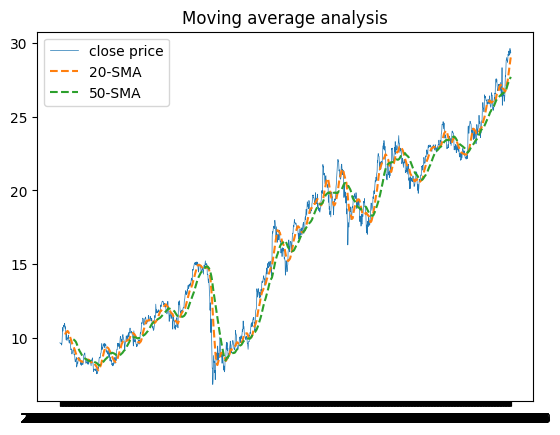

In [10]:
#moving average
newData['SMA_20'] = newData['Close'].rolling(20).mean()
newData['SMA_50']= newData['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(newData['Close'],label='close price',linewidth=0.5)
plt.plot(newData['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(newData['SMA_50'],label='50-SMA',linestyle='--')
plt.title('Moving average analysis')
plt.legend()


In [11]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=0da10419d9ad9babf6dd001cebad8a642d555c5f71f2fae6674545137fbd1fc9
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


<ipython-input-12-ab7b9fbaf0d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['BB_High']=bb.bollinger_hband()
<ipython-input-12-ab7b9fbaf0d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['BB_Low']=bb.bollinger_lband()


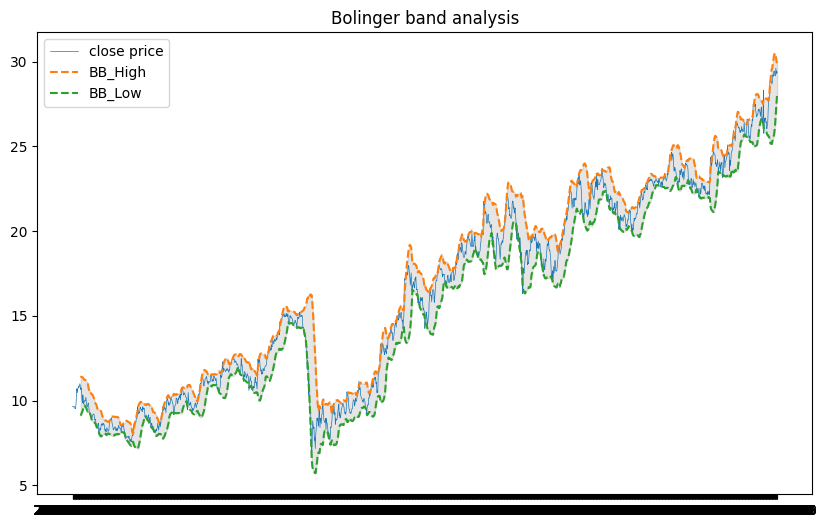

In [12]:

bb = ta.volatility.BollingerBands(newData['Close'],window=20,window_dev=2)
newData['BB_High']=bb.bollinger_hband()
newData['BB_Low']=bb.bollinger_lband()
plt.figure(1,(10,6))
plt.plot(newData['Close'],label='close price',linewidth=0.5)
plt.plot(newData['BB_High'],label='BB_High',linestyle='--')
plt.plot(newData['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(newData.index,newData['BB_High'],newData['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()


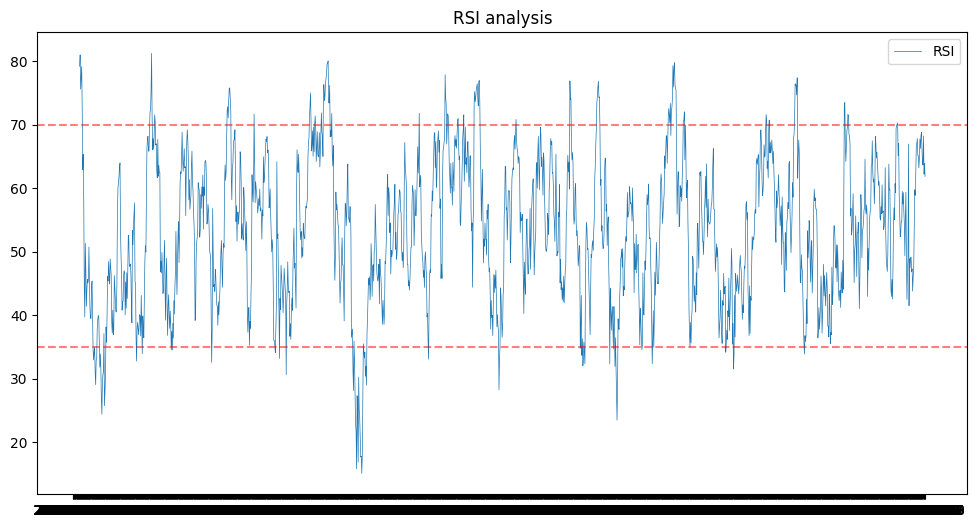

In [15]:
newData['RSI']=ta.momentum.rsi(newData['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(newData['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(35,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()